### loanId- nominal
    -- its just an id with no ranking 
### gender- nominal
    -- it is nominal with no ranking
### married- nominal
    -- it is nominal because this has no ranking as married>not-married
### dependents- ordinal
    -- number of dependents is ordinal as 2>1>0
### education- nominal
    -- education is ordinal as educated>noneducated
### self-employed- nominal
    -- its nominal because there is no ranking as self_employed>not_self_employed
### applicant_income- continuous
    -- its not a fixed value
### co-applicant_income- continuous
    -- its not a fixed values but can be any things
### loan_amount- continuos
    -- its also not a particular value but a continuos
### loan_amount_term - discrete
    -- its a fixed term in years 
### credit_history- discrete
    --its discrete as credit history is 0/1
### property_area-ordinal
    -- its ordinal as urban>semiurban>rural
### loan_status- nominal
    --its nominal as there is no Y>N  or any such ranking

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns 
data = pd.read_csv("loan_approved.csv")
print(data.info(),"\n")
print("length",len(data["Loan_ID"].unique()))
print(data["Gender"].unique())
print(data.Gender.value_counts())
print(data["Dependents"].unique())
print(data["Education"].unique())
print(data["Self_Employed"].unique())
print(data["ApplicantIncome"].unique())
print(data["CoapplicantIncome"].unique())
print(data["ApplicantIncome"].unique())
print(data["Loan_Amount_Term"].unique())
print(data['Credit_History'].unique())
print(data['Property_Area'].unique())
print(data['Loan_Status (Approved)'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None 

length 614
['Male' 'Female' na

3
0
0    Male
Name: Gender, dtype: object
0
0
applicant income column 5403.459283387622 6109.041673387174
0.07293135984867927
-0.13430245319192863
-0.2604269815867062
81000
150


1621.2457980271008 2926.2483692241917
-0.5540356092387764


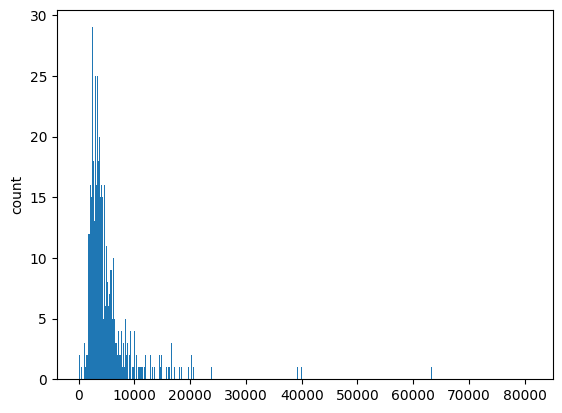

In [191]:
print(data["Married"].isna().sum())
data["Married"] = data["Married"].fillna("No")
print( data["Married"].isna().sum())

print(data["Gender"].mode())
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Gender"].isna().sum()

data["ApplicantIncome"]=data["ApplicantIncome"].fillna(value=data["ApplicantIncome"].mean())
print(data["ApplicantIncome"].isna().sum())

data["CoapplicantIncome"]=data["CoapplicantIncome"].fillna(value=data["CoapplicantIncome"].mean())
print(data["CoapplicantIncome"].isna().sum())

data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["LoanAmount"].isna().sum()

data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
data["Loan_Amount_Term"].isna().sum()

data["Dependents"]=data["Dependents"].fillna(0)
data["Dependents"].isna().sum()

data["Education"]=data["Education"].fillna(value="No")
data['Education'].isna().sum()

data["Self_Employed"]=data["Self_Employed"].fillna("No")

data["Credit_History"]=data["Credit_History"].fillna(1)

data["Property_Area"]=data["Property_Area"].fillna(data["Property_Area"].mode()[0])

data["Credit_History"].value_counts()
mean=data["ApplicantIncome"].mean()
std=data["ApplicantIncome"].std()
median=data["ApplicantIncome"].median()
print("applicant income column",mean,std)
z1=(5849-mean)/std
print(z1)
z1=(4583-mean)/std
print(z1)

zmed=(median-mean)/std
print(zmed)
print(data.ApplicantIncome.max())
print(data.ApplicantIncome.min())

print("\n")
co_mean=data["CoapplicantIncome"].mean()
co_std=data["CoapplicantIncome"].std()
print(co_mean,co_std)
z2=(0-co_mean)/co_std
print(z2)

import matplotlib.pyplot as plt

plt.hist(data["ApplicantIncome"],bins=614)
plt.ylabel("count")
plt.show()


In [192]:

print("applicant income skew ",data["ApplicantIncome"].skew()) #Right-skewed distribution
print("coapplicant income skew ",data["CoapplicantIncome"].skew()) #Right-skewed distribution
print("loan amount skew ",data['LoanAmount'].skew()) #Right-skewed distribution
print("loan amount term skew ",data['Loan_Amount_Term'].skew()) #left-skewed

print("\n") 

print("applicant income kurtosis",data["ApplicantIncome"].kurtosis()) #extremely heavy tailed (leptokurtic)
print("coapplicant income kurtosis ",data["CoapplicantIncome"].kurtosis()) #extremely heavy tailed (leptokurtic)
print("loan amount kurtosis ",data['LoanAmount'].kurtosis()) #heavy tailed (leptokurtic)
print("loan amount term kurtosis ",data['Loan_Amount_Term'].kurtosis()) #heavy-tailed (leptokurtic)





applicant income skew  6.539513113994625
coapplicant income skew  7.491531216657306
loan amount skew  2.726601144105299
loan amount term skew  -2.3896799467122745


applicant income kurtosis 60.54067593369113
coapplicant income kurtosis  84.95638421103374
loan amount kurtosis  10.896456468091559
loan amount term kurtosis  6.897995269508927


In [193]:
pd1=pd.get_dummies(data["Gender"],dtype=int,drop_first=True,prefix="Gender")
data=pd.concat([data,pd1],axis=1)

pd1=pd.get_dummies(data["Education"],dtype=int,drop_first=True,prefix="Education")
data=pd.concat([data,pd1],axis=1)

pd1=pd.get_dummies(data["Married"],dtype=int,drop_first=True,prefix="Married")
data=pd.concat([data,pd1],axis=1)

pd1=pd.get_dummies(data["Self_Employed"],drop_first=True,dtype=int,prefix="Self_Employed")
data=pd.concat([data,pd1],axis=1)

pd1=pd.get_dummies(data["Property_Area"],dtype=int,prefix="PA",drop_first=True)
data=pd.concat([data,pd1],axis=1)

pd1=pd.get_dummies(data["Dependents"],dtype=int,prefix="dependents",drop_first=True)
data=pd.concat([data,pd1],axis=1)

data.drop(columns=["Gender","Education","Married","Self_Employed","Property_Area","Dependents"])

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_Male,Education_Not Graduate,Married_Yes,Self_Employed_Yes,PA_Semiurban,PA_Urban,dependents_0,dependents_1,dependents_2,dependents_3+
0,LP001002,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,0,1,1,0,0,0
1,LP001003,4583,1508.0,128.000000,360.0,1.0,N,1,0,1,0,0,0,0,1,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,Y,1,0,1,1,0,1,1,0,0,0
3,LP001006,2583,2358.0,120.000000,360.0,1.0,Y,1,1,1,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0,1.0,Y,0,0,0,0,0,0,1,0,0,0
610,LP002979,4106,0.0,40.000000,180.0,1.0,Y,1,0,1,0,0,0,0,0,0,1
611,LP002983,8072,240.0,253.000000,360.0,1.0,Y,1,0,1,0,0,1,0,1,0,0
612,LP002984,7583,0.0,187.000000,360.0,1.0,Y,1,0,1,0,0,1,0,0,1,0


0.024376135751782733 2.3999414421592773
-0.14564645710551902 -1.8778432766544493
-0.0925125048077767 4.778393672309124
0.38583949459935507 6.999583457144258


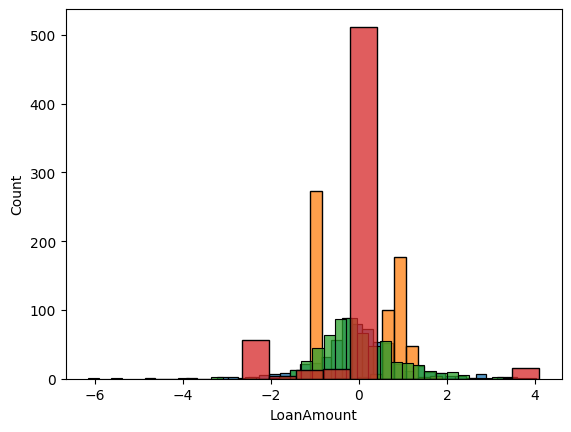

In [194]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer("yeo-johnson")

data["LoanAmount"]=trans.fit_transform(data[["LoanAmount"]])
data["LoanAmount"].shape

sns.histplot(data["LoanAmount"])
print(data["LoanAmount"].skew(),data["LoanAmount"].kurtosis())

data["CoapplicantIncome"]=trans.fit_transform(data[["CoapplicantIncome"]])
data["CoapplicantIncome"].shape

sns.histplot(data["CoapplicantIncome"])
print(data["CoapplicantIncome"].skew(),data["CoapplicantIncome"].kurtosis())

trans = PowerTransformer("box-cox")

data["ApplicantIncome"]=trans.fit_transform(data[["ApplicantIncome"]])
data["ApplicantIncome"].shape

sns.histplot(data["ApplicantIncome"])
print(data["ApplicantIncome"].skew(),data["ApplicantIncome"].kurtosis())

data["Loan_Amount_Term"]=trans.fit_transform(data[["Loan_Amount_Term"]])
data["Loan_Amount_Term"].shape

sns.histplot(data["Loan_Amount_Term"])
print(data["Loan_Amount_Term"].skew(),data["Loan_Amount_Term"].kurtosis())



